In [1]:
#!pip install opencv-python


#https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [2]:
import pandas as pd
import numpy as np
import os
import cv2

In [3]:
from matplotlib import pyplot as plt

import matplotlib.image as mpimg

In [4]:
#dataset
#https://www.kaggle.com/puneet6060/intel-image-classification/version/2

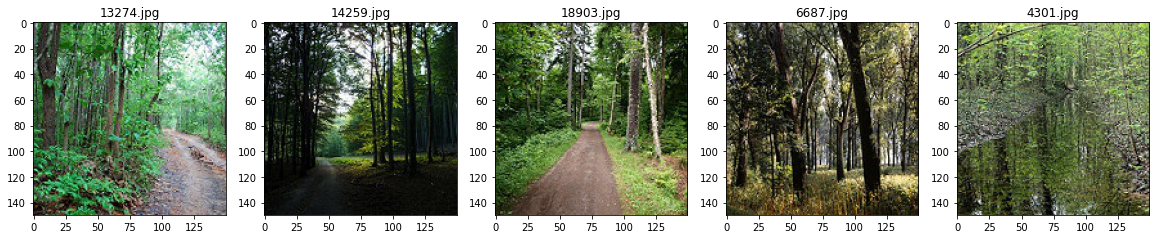

In [5]:
plt.figure(figsize=(20,20))


#linux filesystem path


img_folder=r'archive/seg_train/seg_train/forest'


for i in range(5):
    
    file = np.random.choice(os.listdir(img_folder))
    
    image_path= os.path.join(img_folder, file)
    
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    
    ax.title.set_text(file)
    
    plt.imshow(img)

In [5]:
IMG_WIDTH, IMG_HEIGHT = 200,200

In [6]:
print(IMG_WIDTH,IMG_HEIGHT)

200 200


In [7]:
def create_dataset(img_folder):   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        
        for file in os.listdir(os.path.join(img_folder, dir1)): 
            
            image_path= os.path.join(img_folder, dir1,  file)
            
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            
            image=np.array(image)
            
            image = image.astype('float32')
            
            image /= 255 
            
            img_data_array.append(image)
            
            class_name.append(dir1)
            
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(r'archive/seg_train/seg_train/')

In [8]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [9]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [10]:
from PIL import Image
#image= np.array(Image.open(image_path))

In [11]:
#https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model

In [13]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

In [3]:
#convert the input data to tensors to train the model by using tf.cast()
#history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=5)